> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data contains medical appointments records of patients in Brazil and it focuses on whether patients usually show up on their appointment or not. The data is made up of 110527 rows and 14 columns. Below are the columns and a brief explanation of what they mean. 

> **PatientID:** personal identification of the patient
> **AppointmentID:** Identification of each appointment
> **Gender:** Identifies the patient as either Male or Female
> **Age:** How old is the patient
> **Neighbourhood:** The patient Area of location
>**(Hipertension, Diabetes, Alcoholism, Hadncap):** These columns indicate either 1 or 0 to indicate if the patient has the disease or not (1 means yes he/she has it, 0 means he/she does not have it)
>**SMS_received:** This indicates whether patients received an sms to remind him or her about the appointment
>  **ScheduledDay:** tells us on what day the patient set up their appointment.
> **Neighborhood:** indicates the location of the hospital.
> **Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> **No-show:** Tell us whether the patient showed up per the schedule or did not show. Yes indicates did not show up and No indicate did show up


### Question(s) for Analysis
> 1. Which particular disease patients show up more for their appointment. <br>
> 2. Does the scholarship package has an influence on the show up?
> 3. Which age group usually show up the most. Or does age affect the show up? <br>
> 4. Does SMS alert influence the show up 


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [43]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [44]:
noShow_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
print('The shape of the DataFrame is: ', noShow_df.shape)

The shape of the DataFrame is:  (110527, 14)


In [46]:
noShow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:
noShow_df[noShow_df['Age'] <= 0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

In [48]:
noShow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**Initial investigation of the shows we have 110527 record or rows, 14 columns. We also observed that we don't have missing data. However, we need to do some clean since some of the columns have incorrect data format. Also we have seen that we have some patients with ages less than 0. We need to drop these**


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [49]:
# Converting ScheduledDay, AppointmentDay to datetime format

noShow_df[[ 'ScheduledDay','AppointmentDay']] = noShow_df[[ 'ScheduledDay','AppointmentDay']].apply(pd.to_datetime)


In [50]:
#Converting Patient ID also to string. With the format as float we would first convert it to integer to drop the decimal point,
#then convert it to string and renaming the No-show column
noShow_df[['PatientId']] = noShow_df[['PatientId']].astype('int64').astype(str)
noShow_df.rename(columns= {'No-show': 'No_show'}, inplace=True)
noShow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


In [51]:
# Creating an additional column to determine the day of the week
noShow_df['DayOfWeek'] = noShow_df['AppointmentDay'].dt.day_name()
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,DayOfWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [52]:
noShow_df = noShow_df[~(noShow_df['Age'] < 0)]  
noShow_df.shape

(110526, 15)

In [53]:
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,DayOfWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Disease correlation with show-up)

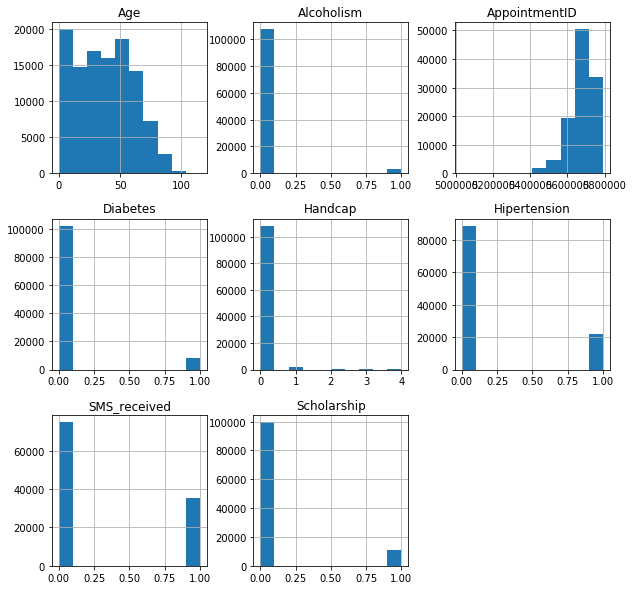

In [54]:
noShow_df.hist(figsize=(10,10));

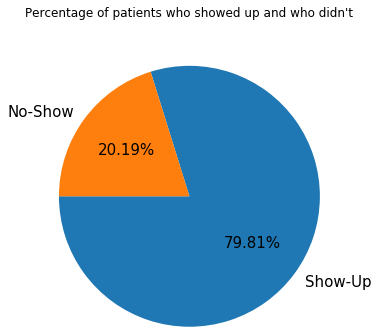

In [55]:
#Getting No-Show value counts to know whether we have a lot of patient not showing up or more patients are showing up
label_Names = ["Show-Up", "No-Show"]
data = [noShow_df.loc[(noShow_df['No_show'] == 'No')].count()[0], noShow_df.loc[(noShow_df['No_show'] == 'Yes')].count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5 ,labels = label_Names, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.3);

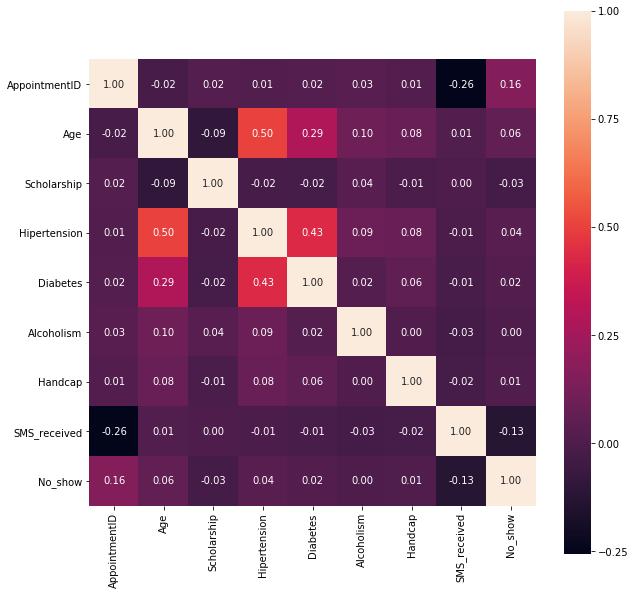

In [56]:
noShow_df['No_show'] = noShow_df['No_show'].map({'Yes': 0, 'No':1})
correlation = noShow_df.corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

### From the above heatmap, we have observed that we have strong correlation on the following variables:
>  - Hipertension and Age <br>
> -  Hipertension and Diabetes

### Do Females show up more their appointments or their male counterpart
### Do patients who receive sms tend to show up for their appointment?

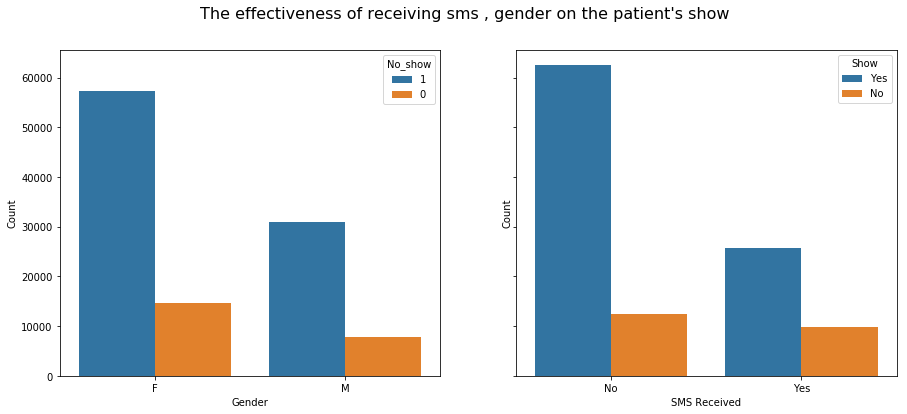

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
hue_order=[1,0]

sms_mapping = noShow_df['SMS_received'].map({1:'Yes',0: 'No'})

sns.countplot(x='Gender', data=noShow_df, hue='No_show', ax=ax1,  hue_order=hue_order)
sns.countplot(x= sms_mapping, data=noShow_df, hue='No_show', ax=ax2,  hue_order=hue_order)
fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle("The effectiveness of receiving sms , gender on the patient's show", fontsize=16);
ax1.set(xlabel='Gender', ylabel='Count')
ax2.set(xlabel='SMS Received', ylabel='Count')

plt.legend(loc='upper right', title='Show',labels=['Yes', 'No']);

### From the above graph, it is clear that more Females show up for their appointments than Males. Also, People who did not receive sms show up more than those who had received sms

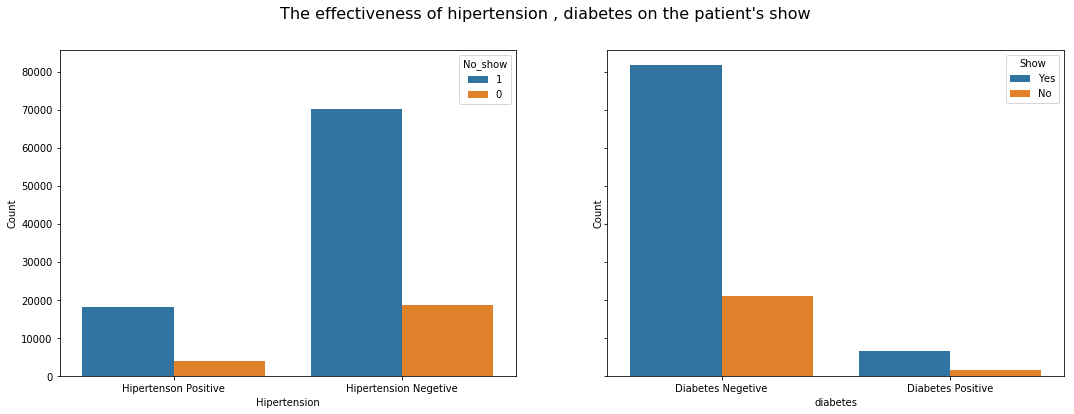

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
hue_order=[1,0]

hipertension_maping=noShow_df['Hipertension'].map({1:'Hipertenson Positive',0: 'Hipertension Negetive'})
diabetes_maping=noShow_df['Diabetes'].map({1:'Diabetes Positive',0: 'Diabetes Negetive'})


sns.countplot(x=hipertension_maping, data=noShow_df, hue= 'No_show', ax=ax1,  hue_order=hue_order)
sns.countplot(x=diabetes_maping, data=noShow_df, hue= 'No_show', ax=ax2,  hue_order=hue_order)

fig.set_figwidth(18)
fig.set_figheight(6)
fig.suptitle("The effectiveness of hipertension , diabetes on the patient's show", fontsize=16);

ax1.set(xlabel='Hipertension', ylabel='Count')
ax2.set(xlabel='diabetes', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right', title='Show',labels=['Yes', 'No']);

### In both diagrams, it is clear that patients who are negetive in hipertension and diabetes show up more than patients who are positive in those two conditions

In [60]:
bins_labels=['childs','young-adults','middel-age-adults','old-adults']
noShow_df['age_level'] = pd.qcut(noShow_df['Age'], q=4 ,labels=bins_labels)

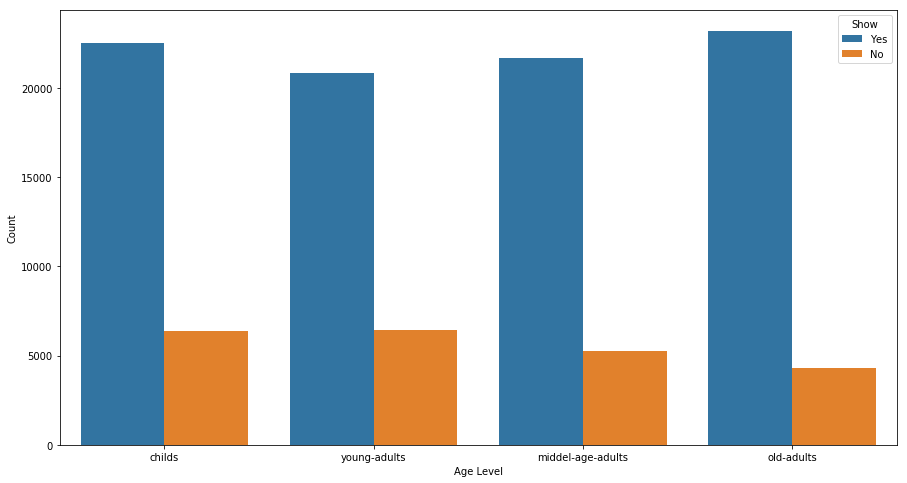

In [61]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='age_level', data=noShow_df, hue='No_show', hue_order=hue_order)
fig.set_figwidth(15)
fig.set_figheight(8)
ax1.set(xlabel='Age Level', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right', title='Show',labels=['Yes', 'No']);

### From the diagrams above, young-adults have low show up. Old-adult and children have more show up.

### Research Question   ( Is scholarship affect the patient's show up?)

[Text(17.2,0.5,'Count'), Text(0.5,17.2,'Scholarship')]

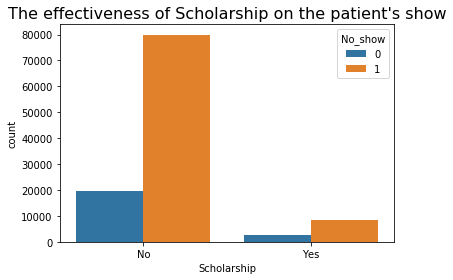

In [62]:

fig = plt.subplots(ncols=0)

scholarship_maping=noShow_df['Scholarship'].map({1:'Yes',0: 'No'})

sns.countplot(x=scholarship_maping, data=noShow_df, hue= 'No_show')

plt.title("The effectiveness of Scholarship on the patient's show", fontsize=16);
ax1.set(xlabel='Scholarship', ylabel='Count')


### It is also clear from the above graph that patients with no scholarships show for their appointment than those with scholarship

<a id='conclusions'></a>
## Conclusions

> Analysis from the EDA step shows that:

> Patients who are negetive for either diabetes or hipertension are more show up for their appointment than those who positive for the two conditions

> Also, it was found that gender plays a role on the show since more females show up more than males. This can be concluded that females are more likely to show up for their appointment than males.

> Age also has influence on the show. From the analysis, more old age and children show up for their appointment than young adults.

> Last the scholarship package turn not have an influence on the show up since patients with scholarship package show less than those with scholarship package

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0